<a href="https://colab.research.google.com/github/afif-af/ML/blob/main/advanceLearningAlgorithmWeek01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C2_W1_Lab01

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError,BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


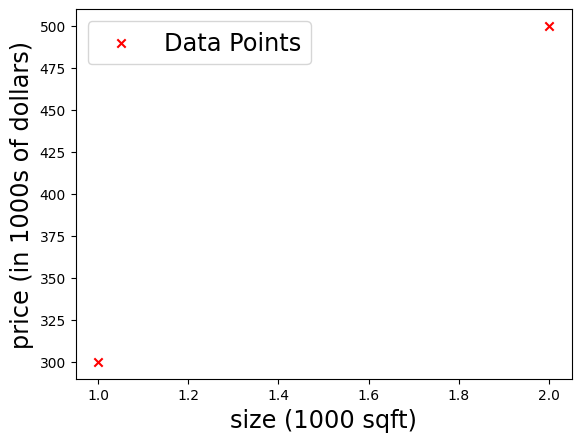

In [25]:
x_train=np.array([[1.0],[2.0]],dtype=np.float32)
y_train=np.array([[300.0],[500.0]],dtype=np.float32)
fig,ax=plt.subplots(1,1)
ax.scatter(x_train,y_train,marker='x',c='r',label="Data Points")
ax.legend(fontsize='xx-large')
ax.set_xlabel('size (1000 sqft)',fontsize='xx-large')
ax.set_ylabel('price (in 1000s of dollars)',fontsize='xx-large')
plt.show()

In [26]:
linear_layer=tf.keras.layers.Dense(units=1,activation='linear',)

In [27]:
linear_layer.get_weights()

[]

In [31]:
a1=linear_layer(x_train[0].reshape(1,1))
print(a1)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


In [32]:
w,b=linear_layer.get_weights()
print(f"w={w},b={b}")

w=[[200.]],b=[100.]


In [33]:
set_w=np.array([[200]])
set_b=np.array([100])

linear_layer.set_weights([set_w,set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [34]:
a1=linear_layer(x_train[0].reshape(1,1))
print(a1)
alin=np.dot(set_w,x_train[0].reshape(1,1))+set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [35]:
prediction_tf=linear_layer(x_train)
prediction_np=np.dot(x_train,set_w)+set_b

In [36]:
plt_linear(x_train,y_train,prediction_tf,prediction_np)

NameError: name 'plt_linear' is not defined

In [37]:
x_train=np.array([0.,1,2,3,4,5],dtype=np.float32).reshape(-1,1)
y_train=np.array([0,0,0,1,1,1],dtype=np.float32).reshape(-1,1)

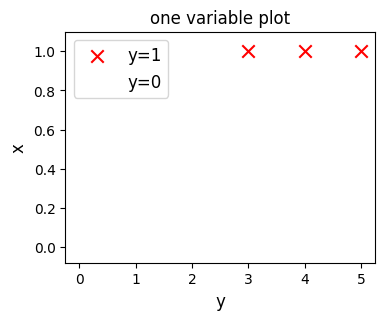

In [40]:
pos=y_train==1
neg=y_train==0

fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train[pos],y_train[pos],marker='x',s=80,c='red',label="y=1")
ax.scatter(x_train[neg],y_train[neg],marker='o',s=100,label="y=0",facecolors='none',lw=3)
ax.set_ylim(-0.08,1.1)
ax.set_xlabel('y',fontsize=12)
ax.set_ylabel('x',fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [41]:
model=Sequential([
    tf.keras.layers.Dense(1,input_dim=1,activation='sigmoid',name='L1')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
logistic_layer=model.get_layer('L1')
w,b=logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.5980202]] [0.]
(1, 1) (1,)


In [44]:
set_w=np.array([[2]])
set_b=np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get__weights())

AttributeError: 'Dense' object has no attribute 'get__weights'

In [45]:
a1=model.predict(x_train[0].reshape(1,1))
print(a1)
alog=sigmoid(np.dot(set_w,x_train[0].reshape(1,1))+set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
[[0.01098694]]
tf.Tensor([[0.01098694]], shape=(1, 1), dtype=float64)


In [46]:
plt_logistic(x_train,y_train,model,set_w,set_b,pos,neg)

NameError: name 'plt_logistic' is not defined

# C2_w1_lab02


In [47]:
x,y=load_coffee_data();
print(x.shape,y.shape)

NameError: name 'load_coffee_data' is not defined

In [48]:
plt_roast(x,y)

NameError: name 'plt_roast' is not defined

In [51]:
print(f"Temperature Max, Min pre normalization:{np.max(x[:,0]):0.2f},{np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization:{np.max(x[:,1]):0.2f},{np.min(x[:,1]):0.2f}" )
norm_1=tf.keras.layers.Normalization(axis=-1)
norm_1.adapt(x)
xn=norm_1(x)
print(f"Temperature Max, Min pre normalization:{np.max(x[:,0]):0.2f},{np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization:{np.max(x[:,1]):0.2f},{np.min(x[:,1]):0.2f}")

NameError: name 'x' is not defined

In [50]:
xt=np.tile(xn,(1000,1))
yt=np.tile(y,(1000,1))
print(xt.shape,yt.shape)

NameError: name 'xn' is not defined

In [53]:
tf.random.set_seed(1234)
model=Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3,activation='sigmoid',name='Layer1'),
    Dense(1,activation='sigmoid',name='Layer2')
])

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer2 (Dense)                       │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
L1_num_params=2*3+3
L2_num_params=3*1+1
print("L1 params=",L1_num_params,"L2 params=",L2_num_params)

L1 params= 9 L2 params= 4


In [60]:
W1, b1 = model.get_layer("layer1").get_weights()
w2,b2=model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

ValueError: No such layer: layer1. Existing layers are: ['Layer1', 'Layer2'].

In [61]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

)
model.fit(
    xt,yt,
    epochs=10,
)

NameError: name 'xt' is not defined

In [ ]:
W1, b1 = model.get_layer("layer1").get_weights()
w2,b2=model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

In [62]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

# Replace the weights from your trained model with
# the values above.
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

ValueError: No such layer: layer1. Existing layers are: ['Layer1', 'Layer2'].

In [63]:
# Check if the weights are successfully replaced
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

ValueError: No such layer: layer1. Existing layers are: ['Layer1', 'Layer2'].

In [64]:
yhat=np.zeros_like(predictions)
for i in range(len(predictions)):
  if prediction[i]>=0.5:
    yhat[i]=1
  else:
    yhat[i]=0
print(f"decisions=\n{yhat}")

NameError: name 'predictions' is not defined

In [65]:
yhat=(predictions>=0.5).astype(int)
print(f"decisions=\n{yhat}")

NameError: name 'predictions' is not defined

# C2_W1_lab03

In [67]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
# from lab_utils_common import dlc, sigmoid
# from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

In [ ]:
plt_roast(X,Y)

In [68]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

NameError: name 'X' is not defined

In [69]:
g = sigmoid

In [70]:
def my_dense(a_in,w,b):
  units=w.shape[1]
  a_out=np.zeros(units)
  for i in range(units):
    w=w[:,j]
    z=np.dot(w,a_in)+b[j]
    a_out[j]=g(z)
  return (a_out)


In [71]:
def my_sequential(x,w1,b1,w2,b2):
  a1=my_dense(x,w1,b1)
  a2=my_dense(a1,w2,b2)
  return a2

In [72]:
w1_tmp=np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
w2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [73]:
def my_predict(x, w1, b1, w2, b2):
  m=x.shape[0]
  p=np.zeros((m,1))
  for i in range(m):
    p[i,0]=my_sequential(x[i],w1,b1,w2,b2)
  return (p)

In [75]:
x_tst=np.array([
    [200,13.9],
    [200,17]
])
x_tstn=norm_1(x_tst)
predictions=my_predict(x_tstn,w1_tmp,b1_tmp,w2_tmp,b2_tmp)

NameError: name 'norm_1' is not defined

In [ ]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

In [ ]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

In [ ]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)